# Proyecto EDA Credit Case Study

## Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

## Importacion de los datos e informacion general

### Application Data

'application_data.csv' contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties"

In [2]:
applicationdb = pd.read_csv('/Users/oscarandresvalladarescardona/Desktop/Data Science Bootcamp/Proyecto EDA/archive (1)/application_data.csv')
applicationdb.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
applicationdb.shape

307511

In [4]:
applicationdb.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
applicationdb.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Analisis de variables categoricas

In [6]:
applicationdb.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [7]:
len(applicationdb.select_dtypes(include = "object").columns)

16

### Analisis de variables numericas

In [8]:
applicationdb.select_dtypes(include=["int64","float64"]).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [9]:
len(applicationdb.select_dtypes(include=["int64","float64"]).columns)

106

### Revision de variables nulas

In [10]:
null_count = applicationdb.isnull().sum()
null_percentage = round((applicationdb.isnull().sum()/applicationdb.shape[0])*100, 2)

In [11]:
null_df = pd.DataFrame({'column_name' : applicationdb.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [12]:
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
76,COMMONAREA_MEDI,214865,69.87
48,COMMONAREA_AVG,214865,69.87
62,COMMONAREA_MODE,214865,69.87
70,NONLIVINGAPARTMENTS_MODE,213514,69.43
56,NONLIVINGAPARTMENTS_AVG,213514,69.43
...,...,...,...
14,NAME_FAMILY_STATUS,0,0.00
13,NAME_EDUCATION_TYPE,0,0.00
12,NAME_INCOME_TYPE,0,0.00
9,AMT_ANNUITY,12,0.00


### Eliminacion de variables con valores nulos superiores a 40%

In [13]:
eliminar_columnas = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [14]:
eliminar_columnas

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [15]:
len(eliminar_columnas)

49

In [16]:
applicationdb.drop(columns = eliminar_columnas, inplace = True)

In [17]:
null_menor40 = null_df[null_df['null_percentage'] < 40]
null_menor40.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
28,OCCUPATION_TYPE,96391,31.35
43,EXT_SOURCE_3,60965,19.83
121,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
...,...,...,...
33,HOUR_APPR_PROCESS_START,0,0.00
34,REG_REGION_NOT_LIVE_REGION,0,0.00
35,REG_REGION_NOT_WORK_REGION,0,0.00
36,LIVE_REGION_NOT_WORK_REGION,0,0.00


#### Analisis del valor con nulos mas altos

In [18]:
applicationdb['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [19]:
applicationdb['OCCUPATION_TYPE'].fillna(value = 'Other', inplace = True)

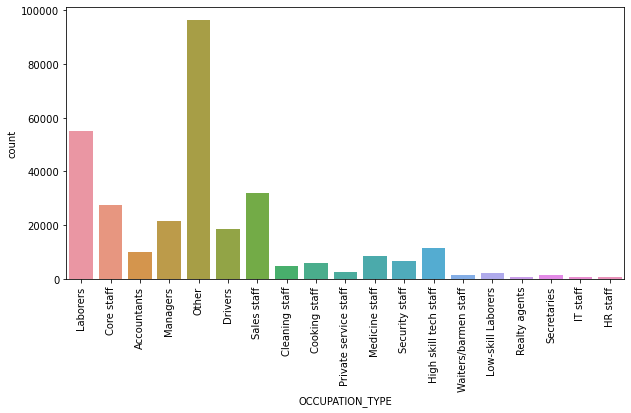

In [20]:
plt.figure(figsize = (10,5))
sns.countplot(data = applicationdb, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

In [21]:
applicationdb['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

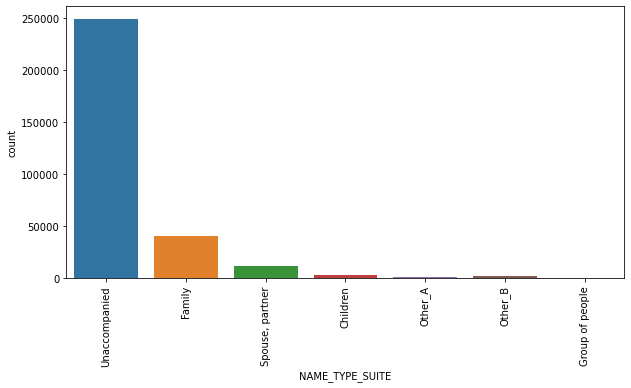

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(data = applicationdb, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

In [34]:
applicationdb['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [35]:
applicationdb[applicationdb['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


In [37]:
applicationdb['CODE_GENDER'] = applicationdb['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)
applicationdb['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [47]:
applicationdb['DAYS_BIRTH'].value_counts().head()

-13749    43
-13481    42
-10020    41
-18248    41
-15771    40
Name: DAYS_BIRTH, dtype: int64

In [48]:
applicationdb['DAYS_BIRTH'].nunique()

17460

In [49]:
applicationdb['DAYS_BIRTH'] = applicationdb['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

In [50]:
applicationdb['YEARS_BIRTH'] = applicationdb['DAYS_BIRTH'].apply(lambda x: round(x/365))

In [66]:
applicationdb['YEARS_BIRTH'].describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64

In [51]:
applicationdb['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [52]:
applicationdb['NAME_FAMILY_STATUS'] = applicationdb['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

In [54]:
applicationdb['DAYS_EMPLOYED'] = applicationdb['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)
applicationdb['DAYS_EMPLOYED'].value_counts().head()

365243    55374
200         156
224         152
199         151
230         151
Name: DAYS_EMPLOYED, dtype: int64

In [55]:
applicationdb[applicationdb['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [56]:
applicationdb['YEARS_EMPLOYED'] = applicationdb['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

In [57]:
applicationdb['DAYS_REGISTRATION'] = applicationdb['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)

In [58]:
applicationdb['DAYS_REGISTRATION'].value_counts().head()

1.0    113
7.0     98
6.0     96
2.0     92
4.0     92
Name: DAYS_REGISTRATION, dtype: int64

In [59]:
applicationdb['YEARS_REGISTRATION'] = applicationdb['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

In [61]:
applicationdb['DAYS_ID_PUBLISH'] = applicationdb['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)
applicationdb['DAYS_ID_PUBLISH'].value_counts().head()

4053    169
4095    162
4046    161
4417    159
4256    158
Name: DAYS_ID_PUBLISH, dtype: int64

In [63]:
applicationdb['DAYS_LAST_PHONE_CHANGE'] = applicationdb['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)
applicationdb['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

0.0    37672
1.0     2812
2.0     2318
3.0     1763
4.0     1285
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

In [90]:
applicationdb['TARGET'].value_counts().sort_values(ascending = False)

0    282686
1     24825
Name: TARGET, dtype: int64

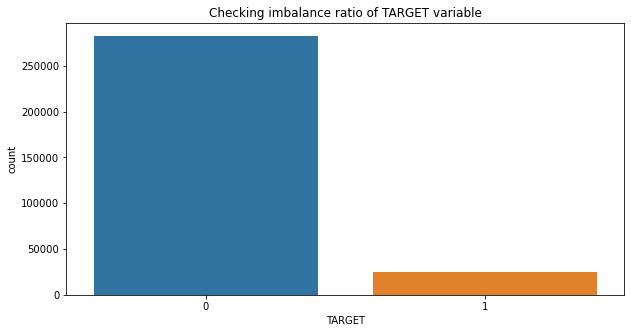

In [91]:
plt.figure(figsize = (10,5))
sns.countplot(x = applicationdb['TARGET'], data = applicationdb)
plt.title('Checking imbalance ratio of TARGET variable')
plt.show()

In [64]:
applicationdb['YEARS_LAST_PHONE_CHANGE'] = applicationdb['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

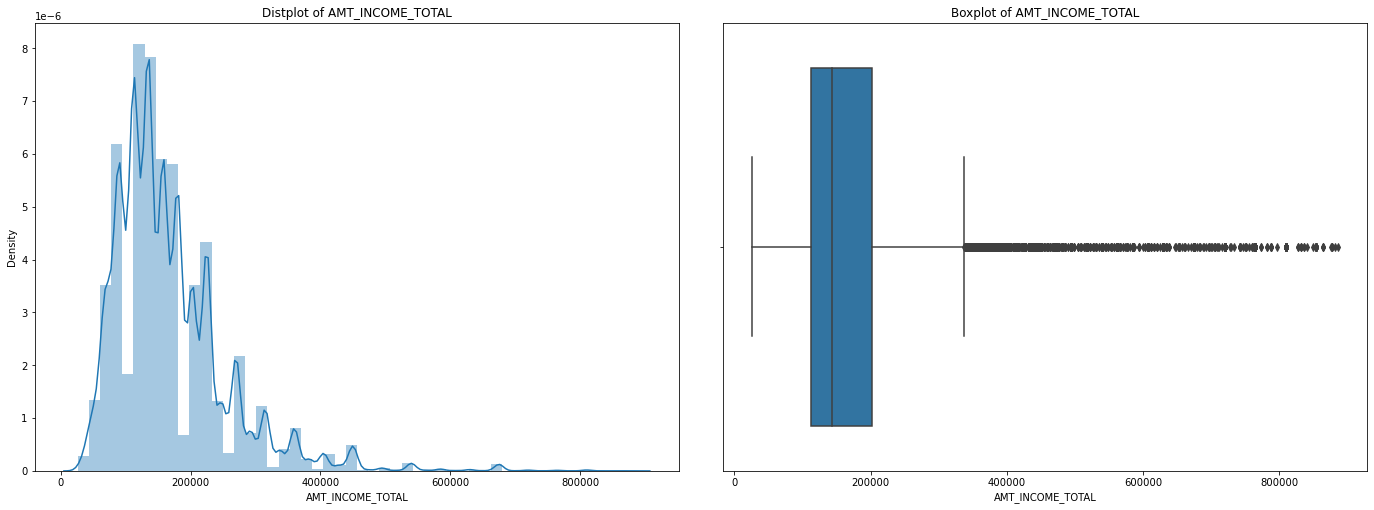

In [65]:
plt.subplots(1,2 ,figsize = (20,8))

plt.subplot(121)
sns.distplot(applicationdb[applicationdb['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
plt.title(pltname)

plt.subplot(122)
sns.boxplot(applicationdb[applicationdb['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
plt.title(pltname)

plt.tight_layout(pad = 4)
plt.show()

In [70]:
df1 = applicationdb[applicationdb['TARGET'] == 1]
df1.TARGET.value_counts()

1    24825
Name: TARGET, dtype: int64

In [72]:
df0 = applicationdb[applicationdb['TARGET'] == 0]
df0.TARGET.value_counts()

0    282686
Name: TARGET, dtype: int64

In [97]:
applicationdb.to_csv("applicationdb_with_targets.csv")

In [73]:
df1['NAME_CONTRACT_TYPE'].value_counts().sort_values(ascending = False)

Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64

In [74]:
df0['NAME_CONTRACT_TYPE'].value_counts().sort_values(ascending = False)

Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64

In [75]:
df1['FLAG_OWN_CAR'].value_counts().sort_values(ascending = False)

N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64

In [76]:
df0['FLAG_OWN_CAR'].value_counts().sort_values(ascending = False)

N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64

In [77]:
df1['NAME_INCOME_TYPE'].value_counts().sort_values(ascending = False)

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

In [78]:
df0['NAME_INCOME_TYPE'].value_counts().sort_values(ascending = False)

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

In [79]:
df1['NAME_EDUCATION_TYPE'].value_counts().sort_values(ascending = False)

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64

In [80]:
df0['NAME_EDUCATION_TYPE'].value_counts().sort_values(ascending = False)

Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64

In [81]:
df1['NAME_FAMILY_STATUS'].value_counts().sort_values(ascending = False)

Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Name: NAME_FAMILY_STATUS, dtype: int64

In [82]:
df0['NAME_FAMILY_STATUS'].value_counts().sort_values(ascending = False)

Married                 181584
Single / not married     40987
Civil marriage           26814
Separated                18150
Widow                    15151
Name: NAME_FAMILY_STATUS, dtype: int64

In [84]:
#Outlier Analysis (Distplot + BoxPlot) - numerical columns

def fn_dist_box(dataset,column):
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(dataset[column], color = 'purple')
    pltname = 'Distplot of ' + column
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(pltname)

    plt.subplot(122)
#     sns.boxplot(y = column, data = dataset, fliersize = 10)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
#     plt.boxplot(dataset[column], flierprops = red_diamond)
    pltname = 'Boxplot of ' + column
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

In [85]:
#Univariate Analysis (Countplot) - categorical columns

def fn_uni_countplot(column):
    plt.figure(figsize = [20,8])
    palt = sns.color_palette("bright")

    plt.subplot(1,2,1)
    pltname = column + ' of clients with payment difficulties'
    plt.title(pltname)
    sns.countplot(x = column, data = df1, order = sorted(df1[column].unique(), reverse = True), palette = palt)
    plt.xticks(rotation = 90)
    
    plt.subplot(1,2,2)
    pltname = column + ' of clients with on-time payments'
    plt.title(pltname)
    sns.countplot(x = column, data = df0, order = sorted(df0[column].unique(), reverse = True), palette = palt)
    plt.xticks(rotation = 90)

    plt.tight_layout(pad = 4)
    plt.show()

In [86]:
#Univariate Analysis (Piechart) - categorical columns

def fn_uni_piechart(column):
    plt.figure(figsize = [20,12])

    plt.subplot(1,2,1)
    pltname = column + ' of clients with payment difficulties'
    plt.title(pltname)
    df1[column].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, colors = ['green','yellow','purple','orange','red'], labeldistance=None)
    plt.legend()
    
    plt.subplot(1,2,2)
    pltname = column + ' of clients with on-time payments'
    plt.title(pltname)
    df0[column].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, colors = ['green','yellow','purple','orange','red'], labeldistance=None)
    
    plt.legend()
    plt.tight_layout(pad = 4)
    plt.show()

In [87]:
#Univariate Analysis (Barplot) - categorical columns

def fn_uni_barplot(column):
    plt.figure(figsize = [20,8])

    plt.subplot(1,2,1)
    (df1[column].value_counts(normalize=True)*100).plot.bar(title = column + " Payment difficulties", color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    (df0[column].value_counts(normalize=True)*100).plot.bar(title = column + " On-Time Payments", color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xticks(rotation=90)

    plt.tight_layout(pad = 4)
    plt.show()

In [88]:
# Bivariate Analysis (boxplot) - categorical V/S continuous variables

def fn_bi_boxplot(categorical,continuous,max_continuous1,max_continuous0,hue_column):
    plt.figure(figsize = [20,12])

    plt.subplot(1,2,1)
    plt.title('Payment Difficulties')
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x = categorical, 
                y = df1[df1[continuous] < max_continuous1][continuous], 
                data = df1, 
                flierprops = red_diamond, 
                order = sorted(df1[categorical].unique(), reverse = True),
                hue = hue_column, hue_order = sorted(df0[hue_column].unique(), reverse = True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    plt.title('On-Time Payments')
    sns.boxplot(x = categorical, 
                y = df0[df0[continuous] < max_continuous0][continuous], 
                data = df0, 
                flierprops = red_diamond, 
                order = sorted(df0[categorical].unique(), reverse = True),
                hue = hue_column, hue_order = sorted(df0[hue_column].unique(), reverse = True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

    plt.tight_layout(pad = 4)
    plt.show()

In [89]:
#Bivariate Analysis (Countplot) - categorical V/S categorical columns

def fn_bi_countplot(column,hue_column):
    plt.figure(figsize = [20,8])
    palt = sns.color_palette("bright")

    plt.subplot(1,2,1)
    pltname = 'Clients with payment difficulties'
    plt.title(pltname)
    sns.countplot(x = column, data = df1, 
                  order = sorted(df1[column].unique(), reverse = True), palette = palt,
                  hue = hue_column, hue_order = sorted(df1[hue_column].unique(), reverse = True))
    plt.xticks(rotation = 90)
    
    plt.subplot(1,2,2)
    pltname = 'Clients with on-time payments'
    plt.title(pltname)
    sns.countplot(x = column, data = df0, 
                  order = sorted(df0[column].unique(), reverse = True), palette = palt,
                  hue = hue_column, hue_order = sorted(df0[hue_column].unique(), reverse = True))
    plt.xticks(rotation = 90)

    plt.tight_layout(pad = 4)
    plt.show()

### Analisis de correlacion

### Previous Application Data

'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [22]:
previousappdb = pd.read_csv('/Users/oscarandresvalladarescardona/Desktop/Data Science Bootcamp/Proyecto EDA/archive (1)/previous_application.csv')
previousappdb.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
previousappdb.shape

(1670214, 37)

In [24]:
previousappdb.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [25]:
previousappdb.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Analisis de variables categoricas

In [26]:
previousappdb.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [27]:
len(previousappdb.select_dtypes(include = "object").columns)

16

### Analisis de variables numericas

In [28]:
previousappdb.select_dtypes(include=["int64","float64"]).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [29]:
len(previousappdb.select_dtypes(include=["int64","float64"]).columns)

21

In [98]:
null_count = previousappdb.isnull().sum()
null_percentage = round((previousappdb.isnull().sum()/previousappdb.shape[0])*100, 2)

In [99]:
null_df = pd.DataFrame({'column_name' : previousappdb.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [100]:
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
14,RATE_INTEREST_PRIVILEGED,1664263,99.64
13,RATE_INTEREST_PRIMARY,1664263,99.64
12,RATE_DOWN_PAYMENT,895844,53.64
6,AMT_DOWN_PAYMENT,895844,53.64
20,NAME_TYPE_SUITE,820405,49.12
36,NFLAG_INSURED_ON_APPROVAL,673065,40.30
31,DAYS_FIRST_DRAWING,673065,40.30
32,DAYS_FIRST_DUE,673065,40.30
33,DAYS_LAST_DUE_1ST_VERSION,673065,40.30
34,DAYS_LAST_DUE,673065,40.30


In [101]:
eliminar_columnas = null_df[null_df['null_percentage'] > 20].column_name.to_list()

In [103]:
previousappdb.drop(columns = eliminar_columnas, inplace = True)

In [104]:
null_menor40 = null_df[null_df['null_percentage'] < 40]
null_menor40.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
7,AMT_GOODS_PRICE,385515,23.08
3,AMT_ANNUITY,372235,22.29
28,CNT_PAYMENT,372230,22.29
30,PRODUCT_COMBINATION,346,0.02
18,NAME_PAYMENT_TYPE,0,0.00
29,NAME_YIELD_GROUP,0,0.00
27,NAME_SELLER_INDUSTRY,0,0.00
26,SELLERPLACE_AREA,0,0.00
25,CHANNEL_TYPE,0,0.00
24,NAME_PRODUCT_TYPE,0,0.00
